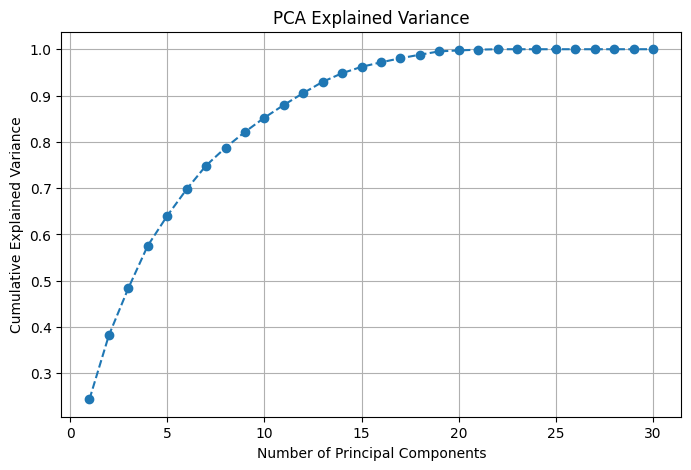

PCA-transformed data saved with 10 components.


In [4]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

# 1. Load cleaned data
df = pd.read_csv('../data/heart_disease_clean.csv')

# 2. Load column info
with open('../models/cols.json', 'r') as f:
    cols = json.load(f)
num_cols = cols['num_cols']
cat_cols = cols['cat_cols']

# 3. Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# 4. Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)

# 5. Apply PCA
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_processed)

# 6. Plot explained variance ratio
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# 7. Choose number of components to keep 90-95% variance (example: 10)
n_components = 10
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_processed)

# 8. Save PCA transformed data to CSV
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['target'] = y.values
pca_df.to_csv('../data/heart_disease_pca.csv', index=False)
print(f"PCA-transformed data saved with {n_components} components.")
